In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.sentiment.util import split_train_test
from sklearn.model_selection import train_test_split
import re
import random

#from google.colab import drive
#drive.mount('/content/drive')

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
file = 'CS173-published-sheet.csv'
df = pd.read_csv(file)
df = df.dropna(axis=0)

In [ ]:
columns_needed = [df['Sadness Lexicons'], df['Sadness Sentences'], df['Joy Lexicons'], df['Joy Sentences'], df['Sadness + Joy Lexicons'], df['Sadness + Joy Sentences'], df['Sadness + Joy + Fear Lexicons'] ,df['Sadness + Joy + Fear Sentences'] ]
drop_columns = [df['Anger Lexicons'], df['Anger Sentences'], df['Disgust Lexicons'], df['Disgust Sentences'], df['Fear + Anger Lexicons'], df['Fear + Anger Sentences'], df['Fear Lexicons'], df['Fear Sentences'], df['Surprise + Disgust Lexicons'], df['Surprise + Disgust Sentences'], df['Surprise Lexicons'], df['Surprise Sentence'] ]

sadlexicons = df['Sadness Lexicons']
joylexicons = df['Joy Lexicons']
sadjoylexicons = df['Sadness + Joy Lexicons']
sadjoyfearlexicons = df['Sadness + Joy + Fear Lexicons']

sadsentences = df['Sadness Sentences']
joysentences = df['Joy Sentences']
sadjoysentences = df['Sadness + Joy Sentences']
df2 = df['Sadness + Joy + Fear Sentences']

sadjoyfearsentences = df2.dropna()
sadjoyfearsentences = df2.dropna(axis=0)

sadwords = list()
joywords = list()

for row in sadlexicons:
  row = row.split(',')
  for word in row:
    word = word.lstrip()
    word = word.rstrip()
    #word = re.sub(r'[^\w\s]', '', word)

    if word not in sadwords:
      sadwords.append(word)

#for word in sadwords:
#  print(word)

for row in joylexicons:
  row = row.split(',')
  for word in row:
    word = word.lstrip()
    word = word.rstrip()
    #word = re.sub(r'[^\w\s]', '', word)

    if word not in joywords:
      joywords.append(word)


for row in sadjoylexicons:
  row = row.split(',')
  for word in row:
    word = word.lstrip()
    word = word.rstrip()
    #word = re.sub(r'[^\w\s]', '', word)

    if word not in sadwords:
      sadwords.append(word)
    if word not in joywords:
      joywords.append(word)


for row in sadjoyfearlexicons:
  if row == 'nan':
    sadjoyfearsentences.dropna()
  row = row.split(',')
  for word in row:
    word = word.lstrip()
    word = word.rstrip()
    #word = re.sub(r'[^\w\s]', '', word)

    if word not in sadwords:
      sadwords.append(word)
    if word not in joywords:
      joywords.append(word)


print('All joy words list : ')
for word in joywords:
  print(word)

print('All sad words list : ')
for word in sadwords:
  print(word)


All joy words list : 
child
laughter
sunny
youth
zeal
Fidelity
Praiseworthy
absolution
abundance
abundant
accolade
accompaniment
accomplish
accomplished
achieve
achievement
acrobat
admirable
admiration
adorable
adoration
adore
advance
advent
advocacy
aesthetics
affection
affluence
alive
allure
aloha
amazingly
ambition
amen
amicable
amnesty
amour
amuse
amused
amusement
amusing
angel
angelic
animated
applause
appreciation
approve
ardent
art
aspiration
aspire
aspiring
astonishment
atone
auspicious
authentic
award

engaged
rekindle
favoriable
feeling
happy
Heartily
complement
Amusing
Charity
Abundance
Aspire
Love
Generous
Merry
chuckle
perfection
festive
succeed
laugh
excitement
jump
hero
ditty
playhouse
rejoicing
entertainment
daughter
Felicity
Smiling
Glee
treasure
Gratifying
joy
laughing
happiness
healing
utopian
perfect
smile
winner
Alive
Beautiful
sweet
glee
Zealous
Exhilaration
exuberance
delicious
beach
love
Miracle
delighted
favorite
friendship
blossom
(blossomed)
fulfillment
wonde

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Section 1.1


In [ ]:
SadSent = list()
JoySent = list()

sadsentences = df['Sadness Sentences']
joysentences = df['Joy Sentences']
sadjoysentences = df['Sadness + Joy Sentences']
df2 = df['Sadness + Joy + Fear Sentences']
sadjoyfearsentences = df2.dropna()
sadjoyfearsentences = df2.dropna(axis=0)

for sent in sadsentences:
  SadSent.append(sent)

for sent in joysentences:
  JoySent.append(sent)

for sent in sadjoysentences:
  SadSent.append(sent)
  JoySent.append(sent)

for sent in sadjoyfearsentences:
  SadSent.append(sent)
  JoySent.append(sent)


joy = dict()
sadness = dict()

# tokenizing each sentence in sad sentences and joy sentences
for sentence in JoySent:
  sentence = re.sub(r'[^\w\s]', '', sentence)
  sent = sent_tokenize(sentence)
  for word in sent:
    words = word_tokenize(word)
    for w in words:
      if w in joywords:
        if w not in joy:
          joy[w] = 1
        else:
          joy[w] += 1

for sentence in SadSent:
  sentence = re.sub(r'[^\w\s]', '', sentence)
  sent = sent_tokenize(sentence)
  for word in sent:
    words = word_tokenize(word)
    for w in words:
      if w in sadwords:
        if w not in sadness:
          sadness[w] = 1
        else:
          sadness[w] += 1

corpus = list()
for s in JoySent:
  corpus.append(s)
for s in SadSent:
  corpus.append(s)

print(corpus)
print(joy)
print(sadness)

['It was a sunny summer morning and the laughter of\n children could be heard from the pool as they splashed water onto each other.', 'The youth are filled with zeal.', 'Ms. Smith taught the lesson to fidelity. The observers\r\nagreed her methods and style were praiseworthy.', 'The women’s soccer team was proud that they achieved their goal of\r\nplacing 1st in their league.\r\nThere’s an adorable puppy at the library.', "It's crazy to see that Jane and Mike were able to rekindle\r\ntheir friendship and now they’re engaged.", 'The clerk asked the child for a small favor of having him\r\npromote the store with flyers.', 'After months of hard work, the team was happy to finally\r\nachieve their goal of winning the state basketball championship.', 'She laughed heartily after someone had told her how well the vibrant colors on her dress\r\ncomplemented her eye color.', 'I love the amusing moments on social media where people heartily donate to\r\ncharity. Regardless of the abundance provid

### Section 1.2

In [ ]:
print('Joy dictionary: ')
for k, v in joy.items():
  print(k, v)

print()
print('Sadness dictionary: ')
for k, v in sadness.items():
  print(k, v)

Joy dictionary: 
sunny 2
laughter 2
youth 5
zeal 3
proud 4
adorable 2
rekindle 1
friendship 2
engaged 1
child 4
happy 10
finally 9
achieve 1
winning 5
heartily 3
love 9
amusing 2
abundance 1
aspire 1
perfection 2
festive 1
chuckle 1
joy 13
journey 5
excitement 5
hero 1
daughter 7
glee 3
beach 5
treasure 1
beautiful 6
Gratifying 1
happiness 3
healing 3
achievement 2
utopian 1
accomplishment 3
smile 3
winner 1
accompaniment 3
alive 2
sweet 1
perfect 2
zealous 2
exhilaration 2
exuberance 3
delicious 1
witty 2
award 2
amour 1
art 4
miracle 2
delighted 1
favorite 3
birthday 2
fulfillment 2
twinkle 2
wonderful 2
happily 1
young 5
elated 3
victory 3
laugh 2
mother 3
thankful 1
gift 1
astonishment 1
share 2
special 2
feeling 12
entertainment 1
amusement 1
whimsical 2
unexpected 1
accomplished 2
inspired 1
hope 3
pleasant 2
blessed 2
delightful 3
music 5
Pleased 1
pride 2
zest 2
childhood 4
melancholy 2
abysmal 1
closure 3
accomplish 1
tough 1
glad 4
holocaust 1
ashamed 1
amused 1
heartfelt 3
r

### Section 1.3
Construct the weight and context matrices

use d = 5



In [ ]:
print(len(joy))
print(len(sadness))
Vocabulary = dict()

199
197


In [ ]:
vocab_size = 0
for sent in corpus:
  tokens = list(sent.lower().split())
  #print(tokens)
  vocab, index = {}, 1
  vocab['<pad>'] = 0
  for token in tokens:
    if token not in vocab:
      vocab[token] = index
      index += 1

  vocab_size = len(vocab)-1
  #print(vocab)
  #print(vocab_size)
  ex_sent = [vocab[word] for word in tokens]
  window_size = 2


In [ ]:
# finding |V|
for k, v in joy.items():
  if k not in Vocabulary:
    Vocabulary[k] = v

for k, v in sadness.items():
  if k not in Vocabulary:
    Vocabulary[k] = v

print(len(Vocabulary))
print(Vocabulary)
vocab = []
for k, v in Vocabulary.items():
  vocab.append(k)
  print(k, v)


248
{'sunny': 2, 'laughter': 2, 'youth': 5, 'zeal': 3, 'proud': 4, 'adorable': 2, 'rekindle': 1, 'friendship': 2, 'engaged': 1, 'child': 4, 'happy': 10, 'finally': 9, 'achieve': 1, 'winning': 5, 'heartily': 3, 'love': 9, 'amusing': 2, 'abundance': 1, 'aspire': 1, 'perfection': 2, 'festive': 1, 'chuckle': 1, 'joy': 13, 'journey': 5, 'excitement': 5, 'hero': 1, 'daughter': 7, 'glee': 3, 'beach': 5, 'treasure': 1, 'beautiful': 6, 'Gratifying': 1, 'happiness': 3, 'healing': 3, 'achievement': 2, 'utopian': 1, 'accomplishment': 3, 'smile': 3, 'winner': 1, 'accompaniment': 3, 'alive': 2, 'sweet': 1, 'perfect': 2, 'zealous': 2, 'exhilaration': 2, 'exuberance': 3, 'delicious': 1, 'witty': 2, 'award': 2, 'amour': 1, 'art': 4, 'miracle': 2, 'delighted': 1, 'favorite': 3, 'birthday': 2, 'fulfillment': 2, 'twinkle': 2, 'wonderful': 2, 'happily': 1, 'young': 5, 'elated': 3, 'victory': 3, 'laugh': 2, 'mother': 3, 'thankful': 1, 'gift': 1, 'astonishment': 1, 'share': 2, 'special': 2, 'feeling': 12, 'e

In [ ]:
W = []
C = []

for word, freq in Vocabulary.items():
  w = [1,1,1,1,1]
  c = [1,1,1,1,1]
  W.append(w)
  C.append(c)

print(len(W))
print(len(C))


248
248


### Section 2

In [ ]:
# weight = .75
#def sampling(vocab):
#  NEGSIZE = 1e6
#  neg_words = list()
#  sorted_vocab = list()
#  freq_sum = np.sum(vocab[word] ** 0.75 for word in vocab)
#  for word in vocab:
#    sorted_vocab.append((word, vocab[word]))

#  sorted_vocab.sort(key=lambda tup: tup[1], reverse=True)
#  for word in sorted_vocab:
#    neg_words.extend([word[0]] * int((word[1]**0.75 / freq_sum) * NEGSIZE))
#  return neg_words
#print(sampling(Vocabulary))

In [ ]:
#p_drop = {word: 1 - np.sqrt(threshold / Vocabulary[word]) / len(Vocabulary) for word in Vocabulary.values()}
#train_words = [word for word in Vocabulary.items() if p_drop[word] < (1 - random.random())]

def getTargets(words, index, window_size=5):
  #R = random.randint(1,5)
  start = max(0, index-5)
  end = min(index+5, len(words)+1)
  targets = words[start: index] + words[index+1:end+1]

  return targets


target_words = getTargets(vocab, 0)
#print(target_words)

window_size = 5
word_lists = list()
all_text = list()

positive_pairs = list()
negative_pairs = list()

#for sent in corpus:
#  all_text += sent
#  for i, word in enumerate(sent):
#    for ws in range(window_size):
#      if i + 1 + ws < len(sent):
#        word_lists.append([word] + [sent[(i+1+ws)]])
#      if i - ws - 1 >= 0:
#        word_lists.append([word] + [sent[(i-ws-1)]])
#  unique_word_dict = create_unique_word_to_dict(all_text)

#print("Text to WordList [main word, context word]")
#print(word_lists)

ex_target = target_words[0]
print(ex_target)

index = 0
for sent in corpus:
  if ex_target in sent:
    #print(sent)
    s = word_tokenize(sent)
    index = s.index(ex_target)
    i1 = index - 1
    i2 = index - 2
    i3 = index + 1
    i4 = index + 2
    wordpair1 = s[i1]
    wordpair2 = s[i2]
    wordpair3 = s[i3]
    wordpair4 = s[i4]
    positive_pairs.append(wordpair1)
    positive_pairs.append(wordpair2)
    positive_pairs.append(wordpair3)
    positive_pairs.append(wordpair4)
    #print(index)
    #print(s)
    break

print('target word: ', ex_target)
print('positive word pairs of target word: ', positive_pairs)

k = 5
for i in range(5):
  for word in vocab:
    if word != ex_target:
      negative_pairs.append(word)
      vocab.remove(word)
      break

print('negative word pairs of target word: ', negative_pairs)


laughter
target word:  laughter
positive word pairs of target word:  ['the', 'and', 'of', 'children']
negative word pairs of target word:  ['sunny', 'youth', 'zeal', 'proud', 'adorable']


In [ ]:
#def create_unique_word_to_dict(sample):
#  words_list = list(set(sample))
#  words_list.sort()
#
#  unique_word_dict_containing_text = {}
#  for i, word in enumerate(words_list):
#    unique_word_dict_containing_text.update({word: i})

#  return unique_word_dict_containing_text

In [ ]:
def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()

In [ ]:
pos_pairs = dict()
neg_pairs = dict()
for i in range(len(positive_pairs)):
  pos_pairs[i] = [ex_target, positive_pairs[i]]

for j in range(len(negative_pairs)):
  neg_pairs[j] = [ex_target, negative_pairs[j]]

print(pos_pairs)

print(neg_pairs)

{0: ['laughter', 'the'], 1: ['laughter', 'and'], 2: ['laughter', 'of'], 3: ['laughter', 'children']}
{0: ['laughter', 'sunny'], 1: ['laughter', 'youth'], 2: ['laughter', 'zeal'], 3: ['laughter', 'proud'], 4: ['laughter', 'adorable']}


### Section 3
Implementing Loss Computation

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def losspositive(cpos, targetword):
  dotprod = np.dot(cpos, targetword)
  s = sigmoid(dotprod)
  return np.dot((s - 1), targetword)

def lossnegative(cneg, targetword):
  dotprod = np.dot(cneg, targetword)
  return np.dot(sigmoid(dotprod), targetword)

def wordderivativeloss(cpos, cneg, word, word2):
  pos = np.dot( (sigmoid((np.dot(cpos, word))) - 1) , cpos)
  k = 5
  neg = 0
  for i in range(k):
    neg += (np.dot( sigmoid(np.dot(cneg[i], word2)) , cneg[i] ) )

  return pos + neg


In [ ]:
import re
training = []
for sentence in corpus:
  nopunc_sent = re.sub(r'[^\w\s]', '', sentence)
  sent = sent_tokenize(nopunc_sent)
  for words in sent:
    word = word_tokenize(words)
    training.append(word)

#for sent in training:
#  print(sent)


In [ ]:
allVocab = dict()
for sent in training:
  for word in sent:
    word = word.lower()
    if word not in allVocab:
      allVocab[word] = 1
    else:
      allVocab[word] += 1


def unigramFreq(word):
  alpha = 0.75

  prob = (allVocab[word] ** alpha) / np.sum(allVocab[word]**alpha, (1-allVocab[word])**alpha )

  return prob

print(allVocab)

def similarity(x, C):
  a = allVocab[x]
  prob = a / len(C)
  p = sigmoid(prob)
  return p

def maximizeSimilarity(target, c_i):
  # x: list [target word, positive context_i]
  a = allVocab[target]
  b = allVocab[c_i]
  prob = (a * b) / len(allVocab)
  p = sigmoid(prob)
  return p

def minimizeSimilarity(target, c_i):
  # x: (target word, negative context_i)
  a = allVocab[target]
  b = allVocab[c_i]
  prob = (a * b) / len(allVocab)
  p = sigmoid(prob)
  return p



{'it': 61, 'was': 173, 'a': 167, 'sunny': 2, 'summer': 1, 'morning': 1, 'and': 152, 'the': 505, 'laughter': 2, 'of': 235, 'children': 4, 'could': 21, 'be': 42, 'heard': 4, 'from': 40, 'pool': 1, 'as': 118, 'they': 36, 'splashed': 1, 'water': 1, 'onto': 3, 'each': 3, 'other': 6, 'youth': 8, 'are': 14, 'filled': 14, 'with': 90, 'zeal': 5, 'ms': 1, 'smith': 1, 'taught': 1, 'lesson': 1, 'to': 232, 'fidelity': 1, 'observers': 1, 'agreed': 1, 'her': 103, 'methods': 2, 'style': 1, 'were': 28, 'praiseworthy': 1, 'womens': 1, 'soccer': 1, 'team': 4, 'proud': 6, 'that': 110, 'achieved': 2, 'their': 46, 'goal': 4, 'placing': 1, '1st': 1, 'in': 101, 'league': 1, 'theres': 3, 'an': 36, 'adorable': 3, 'puppy': 4, 'at': 47, 'library': 1, 'its': 16, 'crazy': 1, 'see': 17, 'jane': 1, 'mike': 1, 'able': 10, 'rekindle': 1, 'friendship': 2, 'now': 12, 'theyre': 1, 'engaged': 1, 'clerk': 1, 'asked': 3, 'child': 7, 'for': 78, 'small': 1, 'favor': 1, 'having': 7, 'him': 23, 'promote': 1, 'store': 4, 'flyers'

In [ ]:
#print('target word: ', ex_target)
#print('positive word pairs of target word: ', positive_pairs)
#print('negative word pairs of target word: ', negative_pairs)

pos_loss = 0
neg_loss = 0
pos = []
neg = []

pt = similarity(ex_target, positive_pairs)
#print(pt)
nt = similarity(ex_target, negative_pairs)
#print(nt)
w1 = list()
w2 = list()

for i in range(len(positive_pairs)):
    s = maximizeSimilarity(ex_target, positive_pairs[i])
    pos.append(s)
    w1.append(pt)

for j in range(len(negative_pairs)):
  s = minimizeSimilarity(ex_target, negative_pairs[j])
  neg.append(s)
  w2.append(nt)

positiveloss = losspositive(pos, w1)
negativeloss = lossnegative(neg, w2)
print(positiveloss[0])
print(negativeloss[0])

-0.12137019809031
0.48958527363835036


### Section 4
Learning and Optimization

In [ ]:
# I am just doing the unique words of joy and sadness words (from lexicon sentences)
uniqueVocab = dict()

for sent in training:
  for word in sent:
    word = word.lower()
    if (word in sadwords or word in joywords) and word not in uniqueVocab:
      uniqueVocab[word] = 1
    elif (word in sadwords or word in joywords) and word in uniqueVocab:
      uniqueVocab[word] += 1

#for k, v in uniqueVocab.items():
#  print(k, v)

print(len(uniqueVocab))
print(uniqueVocab)

248
{'sunny': 2, 'laughter': 2, 'youth': 8, 'zeal': 5, 'proud': 6, 'adorable': 3, 'rekindle': 1, 'friendship': 2, 'engaged': 1, 'child': 7, 'happy': 17, 'finally': 16, 'achieve': 1, 'winning': 9, 'heartily': 4, 'love': 19, 'amusing': 2, 'abundance': 1, 'aspire': 1, 'perfection': 2, 'festive': 1, 'chuckle': 1, 'joy': 19, 'journey': 8, 'excitement': 7, 'hero': 1, 'daughter': 11, 'glee': 4, 'beach': 5, 'treasure': 1, 'beautiful': 9, 'happiness': 5, 'healing': 5, 'achievement': 2, 'utopian': 1, 'accomplishment': 4, 'smile': 5, 'winner': 1, 'accompaniment': 6, 'alive': 3, 'sweet': 1, 'perfect': 2, 'zealous': 3, 'exhilaration': 3, 'exuberance': 4, 'delicious': 1, 'witty': 3, 'award': 2, 'amour': 1, 'art': 6, 'miracle': 3, 'delighted': 1, 'favorite': 5, 'birthday': 3, 'fulfillment': 3, 'twinkle': 3, 'wonderful': 3, 'happily': 1, 'young': 9, 'elated': 4, 'victory': 3, 'laugh': 2, 'mother': 5, 'thankful': 1, 'gift': 1, 'astonishment': 1, 'share': 3, 'special': 3, 'feeling': 26, 'entertainment':

In [ ]:
# k = 5

alpha = 0.75

learning_rates = [ 0.00001, 0.0001, 0.001, 0.01, 0.1]
best_learning_rate = 0
lowest_training_loss = 1

for k, v in uniqueVocab.items():
  target = k
  positivePair = list()
  negativePair = list()

  for sent in training:
    #print(sent)
    if target in sent:
      index = sent.index(target)
      i1 = index - 2
      i2 = index - 1
      i3 = index + 1
      i4 = index + 2
      if 0 <= i1 < len(sent):
        wordpair1 = sent[i1]
        wordpair1 = wordpair1.lower()
        positivePair.append(wordpair1)
      if 0 <= i2 < len(sent):
        wordpair2 = sent[i2]
        wordpair2 = wordpair2.lower()
        positivePair.append(wordpair2)
      if 0 <= i3 < len(sent):
        wordpair3 = sent[i3]
        wordpair3 = wordpair3.lower()
        positivePair.append(wordpair3)
      if 0 <= i4 < len(sent):
        wordpair4 = sent[i4]
        wordpair4 = wordpair4.lower()
        positivePair.append(wordpair4)
      break

  for i in range(5):
    for word in range(len(vocab)):
      if vocab[word] != target and vocab[word] not in negativePair:
        negativePair.append(vocab[word])
        break

  print('target=' , target)
  print('positive word pairs: ', positivePair)
  print('negative word pairs: ', negativePair)

  pos = list()
  neg = list()
  words = list()
  words2 = list()

  deltaPos = 0
  deltaNeg = 0
  deltaWord = 0

  updatePos = 0
  updateNeg = 0
  updateWord = 0

  pt = similarity(target, positivePair)
  #print(pt)
  nt = similarity(target, negativePair)
  #print(nt)

  for i in range(len(positivePair)):
    s = maximizeSimilarity(target, positivePair[i])
    pos.append(s)
    words.append(pt)

  for j in range(len(negativePair)):
    s = minimizeSimilarity(target, negativePair[j])
    neg.append(s)
    words2.append(nt)

  #print(p)
  #print(n)
  deltaPos = losspositive(pos, words)
  deltaNeg = lossnegative(neg, words2)
  print('loss (positive pairs): ', deltaPos)
  print('loss (negative pairs): ', deltaNeg)

  if len(pos) == len(neg):
    deltaWord = wordderivativeloss(pos, neg, words, words2)
    print('loss (word): ', deltaWord)

  for i in learning_rates:
    print(i)
    new_pos = np.dot(i, deltaPos)
    new_neg = np.dot(i, deltaNeg)
    if len(pos) == len(neg):
      new_word = np.dot(i, deltaWord)

    updatePos = pos - new_pos
    updateNeg = neg - new_neg
    print('update (positive): ', updatePos)
    print('update (negative): ', updateNeg)

    if len(pos) == len(neg):
      updateWord = (words - new_word) + (words2 - new_word)
      print('update( word): ', updateWord)

    minimum = min(updatePos)
    minimum_neg = min(updateNeg)
    if min(minimum, minimum_neg):
      lowest_training_loss = min(minimum, minimum_neg)

  print()

print(lowest_training_loss)

Streaming output truncated to the last 5000 lines.

target= happy
positive word pairs:  ['team', 'was', 'to', 'finally']
negative word pairs:  ['laughter', 'rekindle', 'friendship', 'engaged', 'child']
loss (positive pairs):  [-0.05632663 -0.05632663 -0.05632663 -0.05632663]
loss (negative pairs):  [0.89105299 0.89105299 0.89105299 0.89105299 0.89105299]
1e-05
update (positive):  [0.51077203 0.86573419 0.92409795 0.54298671]
update (negative):  [0.50537745 0.50268435 0.50537745 0.50268435 0.51883514]
0.0001
update (positive):  [0.5107771  0.86573926 0.92410302 0.54299178]
update (negative):  [0.50529725 0.50260415 0.50529725 0.50260415 0.51875494]
0.001
update (positive):  [0.51082779 0.86578995 0.92415371 0.54304247]
update (negative):  [0.5044953 0.5018022 0.5044953 0.5018022 0.517953 ]
0.01
update (positive):  [0.51133473 0.86629689 0.92466065 0.54354941]
update (negative):  [0.49647583 0.49378273 0.49647583 0.49378273 0.50993352]
0.1
update (positive):  [0.51640413 0.87136629 0.929

### Section 4 - Final Representation

In [ ]:
import gensim
from gensim.models import Word2Vec
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline


word_list = ['happy', 'happily', 'delighted', 'rekindle', 'laughed', 'joy', 'wrong', 'lonely', 'dying', 'agony', 'suffering', 'weeps', 'weeping']
# labels ^
print(len(word_list))

model = Word2Vec(sentences=training, vector_size=13, window=5, min_count=1, workers=4, sg=1)
#model.save('word2vec.model')
happy_arr, happily_arr, delighted_arr, rekindle_arr, laughed_arr, joy_arr, wrong_arr, lonely_arr, dying_arr, agony_arr, suffering_arr, weeps_arr, weeping_arr = list(), list(), list(), list(), list(), list(), list(), list(), list(), list(), list(), list(), list()

#print('Embeddings of word ',word_list[0], ' with 3 as embedding dimension: ')
#print(model.wv['happy'])
happy_arr.append(model.wv['happy'])
#print('Embeddings of word ',word_list[1], ' with 3 as embedding dimension: ')
#print(model.wv['happily'])
happily_arr.append(model.wv['happily'])
#print('Embeddings of word ',word_list[2], ' with 3 as embedding dimension: ')
#print(model.wv['delighted'])
delighted_arr.append(model.wv['delighted'])
#print('Embeddings of word ',word_list[3], ' with 3 as embedding dimension: ')
#print(model.wv['rekindle'])
rekindle_arr.append(model.wv['rekindle'])
#print('Embeddings of word ',word_list[4], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[4]])
laughed_arr.append(model.wv[word_list[4]])
#print('Embeddings of word ',word_list[5], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[5]])
joy_arr.append(model.wv[word_list[5]])
#print('Embeddings of word ',word_list[6], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[6]])
wrong_arr.append(model.wv[word_list[6]])
#print('Embeddings of word ',word_list[7], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[7]])
lonely_arr.append(model.wv[word_list[7]])
#print('Embeddings of word ',word_list[8], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[8]])
dying_arr.append(model.wv[word_list[8]])
#print('Embeddings of word ',word_list[9], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[9]])
agony_arr.append(model.wv[word_list[9]])
#print('Embeddings of word ',word_list[10], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[10]])
suffering_arr.append(model.wv[word_list[10]])
#print('Embeddings of word ',word_list[11], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[11]])
weeps_arr.append(model.wv[word_list[11]])
#print('Embeddings of word ',word_list[12], ' with 3 as embedding dimension: ')
#print(model.wv[word_list[12]])
#weeping_arr.append(model.wv[word_list[12]])

#fig = plt.figure(figsize=(10, 8))
#ax = plt.axes(projection ='3d')

#x = [happy_arr[0], happily_arr[0], delighted_arr[0], rekindle_arr[0], laughed_arr[0], joy_arr[0],  wrong_arr[0], lonely_arr[0], dying_arr[0], agony_arr[0], suffering_arr[0], weeps_arr[0], weeping_arr[0]]
#y = [happy_arr[1], happily_arr[1], delighted_arr[1], rekindle_arr[1], laughed_arr[1], joy_arr[1], wrong_arr[1], lonely_arr[1], dying_arr[1], agony_arr[1], suffering_arr[1], weeps_arr[1], weeping_arr[1]]]
#z =  [happy_arr[2], happily_arr[2], delighted_arr[2], rekindle_arr[2], laughed_arr[2], joy_arr[2], wrong_arr[2], lonely_arr[2], dying_arr[2], agony_arr[2], suffering_arr[2], weeps_arr[2], weeping_arr[2]]
#ax.scatter(x, y, z, color=['red','green','blue'])
#ax.legend(loc="lower right")



13


['happy', 'happily', 'delighted', 'rekindle', 'laughed', 'joy', 'wrong', 'lonely', 'dying', 'agony', 'suffering', 'weeps', 'weeping']
1638


IndexError: ignored

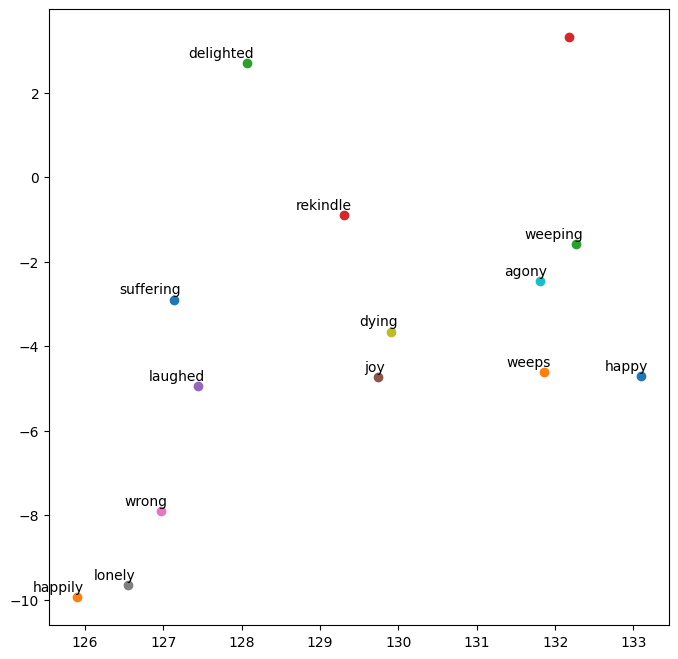

In [ ]:
labels = [word for word in word_list]
print(labels)
tokens = []

#print(model.wv['happy'])

for word in model.wv.key_to_index:
  tokens.append(model.wv[word])

tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2000, random_state=15)
x = np.array(tokens)
#print(x.shape)

new_values = tsne_model.fit_transform(x)

x = []
y = []
for value in new_values:
  x.append(value[0])
  y.append(value[1])

#print(x)
#print(y)
print(len(x))

plt.figure(figsize=(8,8))
for i in range(len(x)):
  plt.scatter(x[i], y[i])
  plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

plt.show()

For the last section, I used this as a reference- https://www.kaggle.com/code/jeffd23/visualizing-word-vectors-with-t-sne to know how to use the tsne module.
